In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import pickle
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from scipy import stats,spatial

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
data = pd.read_csv('C:\\Users\\dtulomba\\Documents\\ProjetsCours\\Projet2\\en.openfoodfacts.org.products_cleaned.csv', sep=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   energy_100g              320772 non-null  float64
 1   fat_100g                 320772 non-null  float64
 2   saturated-fat_100g       320772 non-null  float64
 3   carbohydrates_100g       320772 non-null  float64
 4   sugars_100g              320772 non-null  float64
 5   fiber_100g               320772 non-null  float64
 6   proteins_100g            320772 non-null  float64
 7   salt_100g                320772 non-null  float64
 8   sodium_100g              320772 non-null  float64
 9   nutrition-score-fr_100g  320772 non-null  float64
 10  nutrition_grade_fr       320772 non-null  object 
dtypes: float64(10), object(1)
memory usage: 26.9+ MB


In [5]:
data.head(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0,d
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,14.0,d


In [6]:
data.shape

(320772, 11)

In [7]:
data.dtypes

energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
dtype: object

In [8]:
data.isna().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
nutrition_grade_fr         0
dtype: int64

In [9]:
data["fat_100g"].mean()

12.856199602068449

In [10]:
data["fat_100g"].max()

6006.37634532129

<AxesSubplot:>

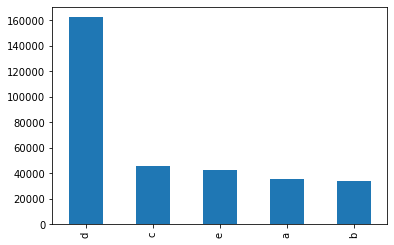

In [11]:
data["nutrition_grade_fr"].value_counts().plot(kind='bar')

In [12]:
list = ['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

In [13]:
data_desc= data.loc[:,list]
data_desc

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0
1,2243.000000,28.5700,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,14.0
2,1941.000000,17.8600,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,13.0
3,2540.000000,57.1400,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,12.0
4,1552.000000,1.4300,1.148830,77.140000,35.170236,5.700000,8.570000,2.028945,0.798797,16.0
...,...,...,...,...,...,...,...,...,...,...
320767,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0
320768,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.0
320769,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0
320770,1142.855327,12.8562,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.0


In [ ]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.pairplot(data_desc)
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(4,3,figsize=(10,20))
axs = axs.ravel()

for i in range(data_desc.shape[1]): 
    sns.distplot(data_desc[data_desc.columns[i]],ax=axs[i])
fig.suptitle('Distribution pour chaque caractéristique de jeu de données de data_desc')
plt.show()

In [14]:
data[data.columns[0]]

0         1142.855327
1         2243.000000
2         1941.000000
3         2540.000000
4         1552.000000
             ...     
320767    1142.855327
320768       0.000000
320769    1142.855327
320770    1142.855327
320771    2092.000000
Name: energy_100g, Length: 320772, dtype: float64

In [15]:
test_pear = pd.DataFrame(columns=['coef_pearson','p_value'])

for i in range(1,len(data_desc.columns)):

    pear, pval = stats.pearsonr(data_desc['nutrition-score-fr_100g'], data_desc[data_desc.columns[i]])
    test_pear.loc[data_desc.columns[i]]=[pear,pval]
    
test_pear 

,coef_pearson,p_value
fat_100g,0.252446,0.000000
saturated-fat_100g,0.443172,0.000000
carbohydrates_100g,0.127805,0.000000
sugars_100g,0.236686,0.000000
fiber_100g,0.001517,0.390317
proteins_100g,0.102504,0.000000
salt_100g,0.005559,0.001641
sodium_100g,0.005559,0.001641
nutrition-score-fr_100g,1.000000,0.000000


Hypothèse nulle : la corrélation entre les deux caractéristiques étudiées est nulle 

Rejet d'hypothèse nulle p_valeur = 0 

=> La corrélation entre nos fonctionnalités n'est pas nulle

C:\Users\dtulomba\AppData\Local\Temp/ipykernel_24072/58644846.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


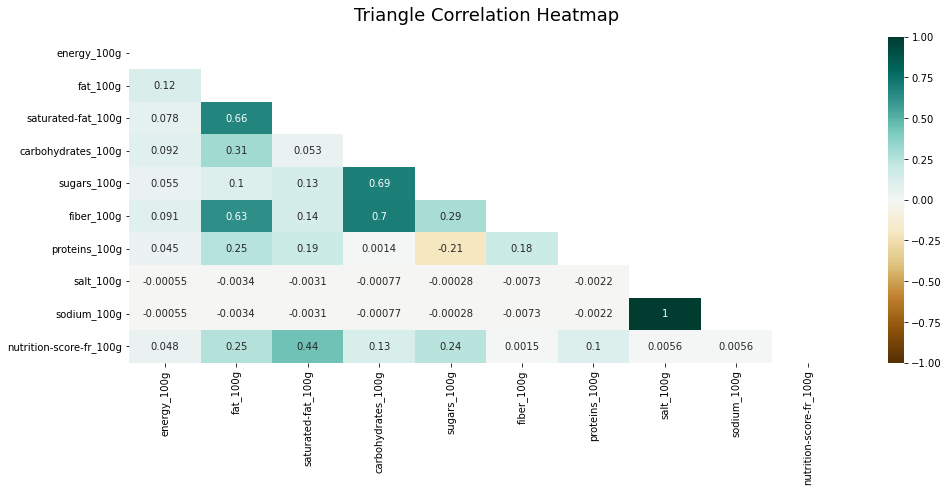

In [16]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Text(0.5, 0.98, 'Corrélation Nutriscore_score avec autres features')

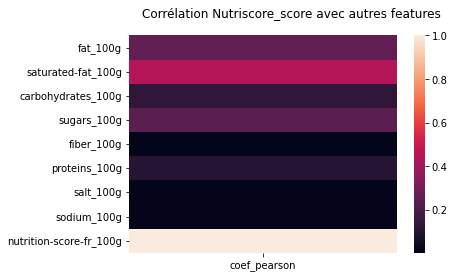

In [17]:
sns.heatmap(test_pear.drop(columns=['p_value']))
plt.suptitle('Corrélation Nutriscore_score avec autres features')

Nous pouvons observer une corrélation peu significative entre les caractéristiques suivantes:

    - graisses et graisses saturées (fat & saturated-fat )
    - sucres (sugars)

<AxesSubplot:>

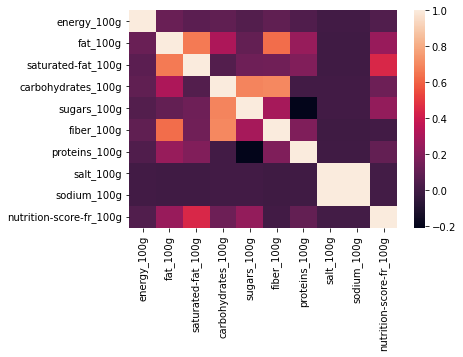

In [18]:
sns.heatmap(data.corr())

Nous pouvons observer une corrélation significative entre les caractéristiques suivantes:

    - graisses / graisses saturées (fat/ saturated-fat à 66%)
    - glucides / sucres (carbohydrates/ sugars)
    - sel / sodium (salt/sodium)
    - le sucre et les protéines sont négativement corrélées
    

### Faire des boxplot 

x = nutriscore_grade 
y= les autres variables 

### Test de corrélation entre le nutriscore_grade et les (autres variables -> nutrition facts ou les variables nutritionnelles)

### Test de normalité (Kolmogorov-Smirnov)

In [19]:
alpha= 0.05
print('===================\nnull hypothesis : studied feature follow a normal distribution.\n ===================\n\n')

for i in range(len(data_desc.columns)): 
    
    D, pval = stats.kstest(data_desc[data_desc.columns[i]], 'norm')
    print('D= {}\nP-value= {}'.format(D,pval))
    if pval<alpha: 
        print('P-value is lower than alpha ({}) we can reject the null hypothesis\n => {} does not follow normal distribution'
              .format(alpha,data_desc.columns[i]))
    else : 
        print('We cannot reject the null hypothesis')
    print('----------------\n')

null hypothesis : studied feature follow a normal distribution.


D= 0.971381045578837
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => energy_100g does not follow normal distribution
----------------

D= 0.6758757178934789
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => fat_100g does not follow normal distribution
----------------

D= 0.5780903835790684
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => saturated-fat_100g does not follow normal distribution
----------------

D= 0.8807131334222442
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => carbohydrates_100g does not follow normal distribution
----------------

D= 0.7401874062409395
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => sugars_100g does not follow normal distribution
----------------

D= 0.5008726497417149
P-value= 0.0
P-value is lower th

On rejette les hypothèses nulles car notre p_value est inférieure à 0.05, nos variables ne suivent pas une distribution normal donc on va faire un test kruskall-wallis car le test d'anova nécessite que nos variables suivent une loi normale. 

### Test De kruskall-wallis

In [20]:
data_desc.columns[-2:]

Index(['sodium_100g', 'nutrition-score-fr_100g'], dtype='object')

In [21]:
data.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,3.207720e+05,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000
mean,1.142855e+03,12.856200,4.817057,32.059983,15.502996,2.245487,7.078369,2.028624,0.798669,13.284062
std,5.817373e+03,19.064569,6.891260,34.976868,19.881705,10.672261,7.575627,114.479784,45.070780,5.580348
min,0.000000e+00,-9.543870,-84.376696,-162.957668,-61.649820,-61.345246,-800.000000,0.000000,-0.000005,1.000000
25%,4.990000e+02,0.880000,0.200000,9.400000,2.200000,0.000000,1.600000,0.120000,0.047244,12.000000
50%,1.142855e+03,10.737726,3.330000,32.059983,10.620000,2.171025,6.940000,0.952500,0.375000,13.000000
75%,1.569000e+03,16.000000,5.000000,50.000000,16.670000,3.080334,8.330000,2.028624,0.798669,16.000000
max,3.251373e+06,6006.376345,550.000000,12981.349295,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


In [22]:
data.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr'],
      dtype='object')

In [23]:
data.loc[data.nutrition_grade_fr == 'a', "groupe_nutriscore"]= "Groupe A"
data.loc[data.nutrition_grade_fr == 'b', "groupe_nutriscore"]= "Groupe B"
data.loc[data.nutrition_grade_fr == 'c', "groupe_nutriscore"] = "Groupe C"
data.loc[data.nutrition_grade_fr == 'd', "groupe_nutriscore"]= "Groupe D"
data.loc[data.nutrition_grade_fr == 'e', "groupe_nutriscore"]= "Groupe E"

null hypothesis : the median of all of the groups are equal.




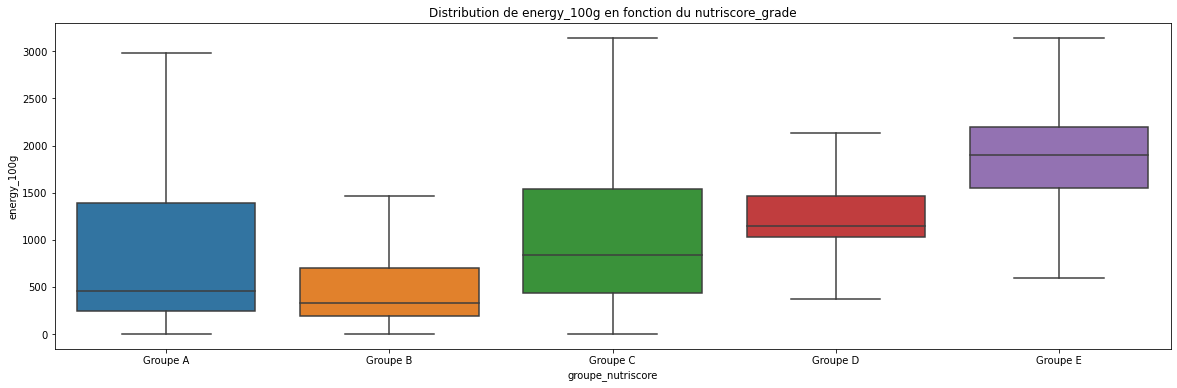

Test de kruskall-wallis entre energy_100g et nutrition_grade
D= 85554.07654614591
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => energy_100g is correlated to nutrition_grade_fr
----------------



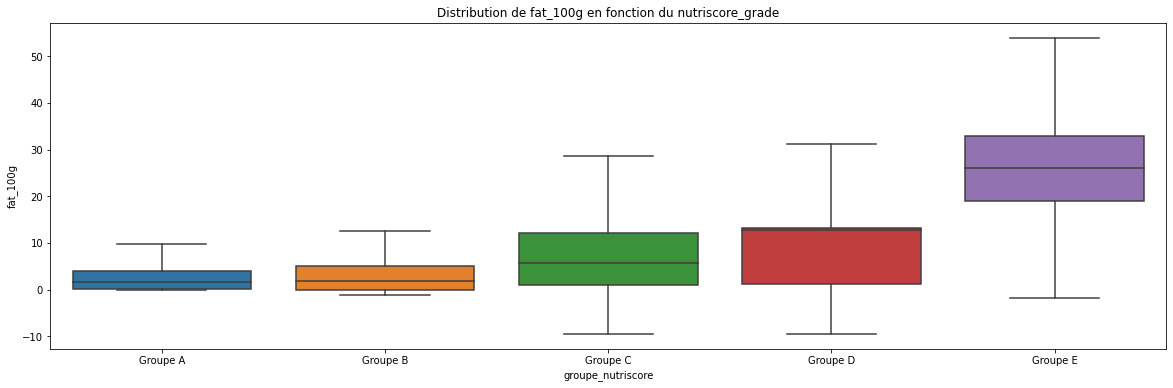

Test de kruskall-wallis entre fat_100g et nutrition_grade
D= 83729.19994765607
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => fat_100g is correlated to nutrition_grade_fr
----------------



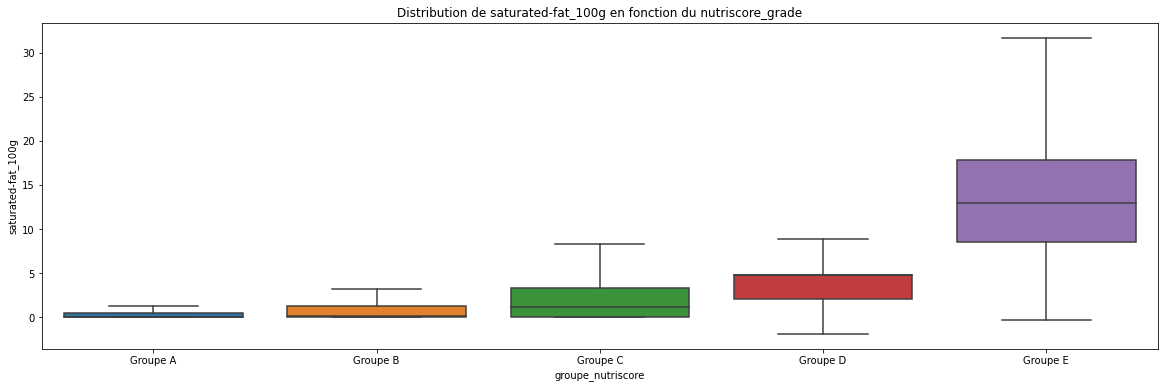

Test de kruskall-wallis entre saturated-fat_100g et nutrition_grade
D= 142533.7726528499
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => saturated-fat_100g is correlated to nutrition_grade_fr
----------------



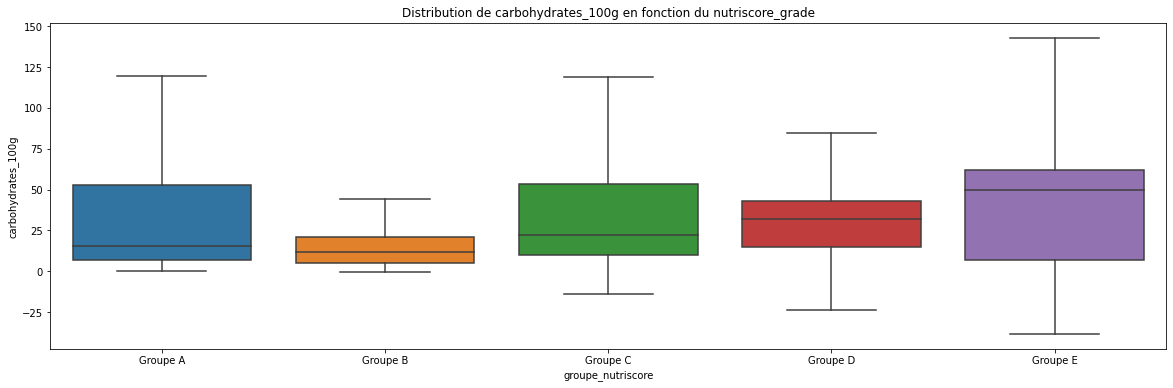

Test de kruskall-wallis entre carbohydrates_100g et nutrition_grade
D= 16179.737035266124
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => carbohydrates_100g is correlated to nutrition_grade_fr
----------------



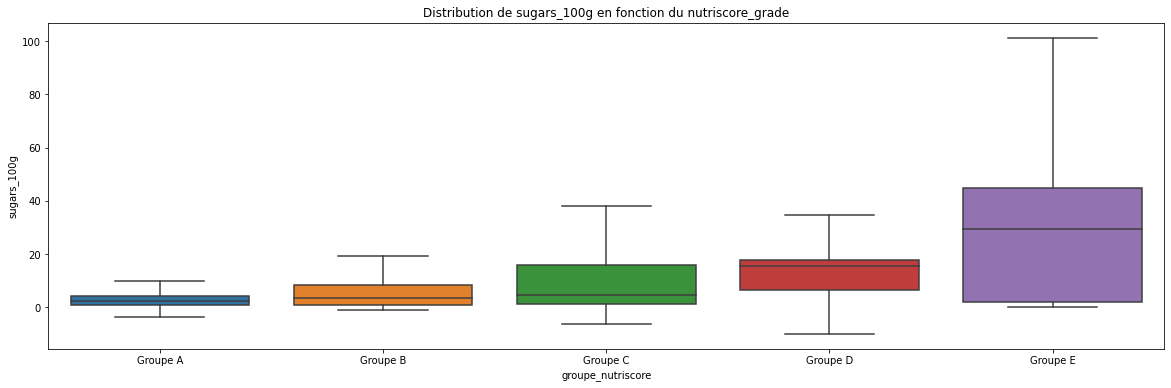

Test de kruskall-wallis entre sugars_100g et nutrition_grade
D= 55534.206096364855
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => sugars_100g is correlated to nutrition_grade_fr
----------------



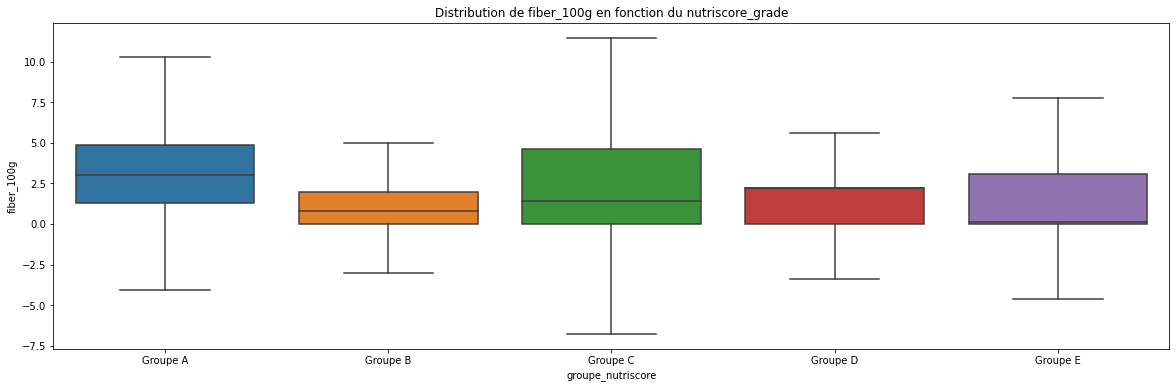

Test de kruskall-wallis entre fiber_100g et nutrition_grade
D= 13121.372703400082
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => fiber_100g is correlated to nutrition_grade_fr
----------------



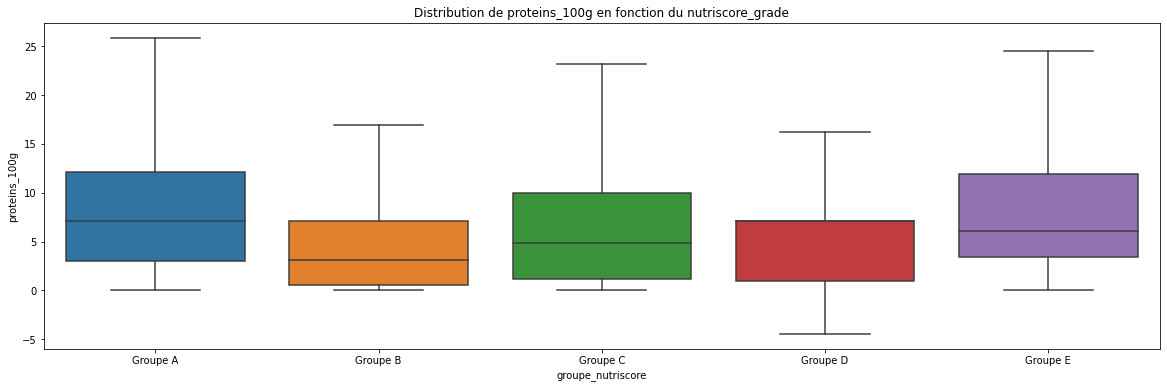

Test de kruskall-wallis entre proteins_100g et nutrition_grade
D= 8119.103604162568
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => proteins_100g is correlated to nutrition_grade_fr
----------------



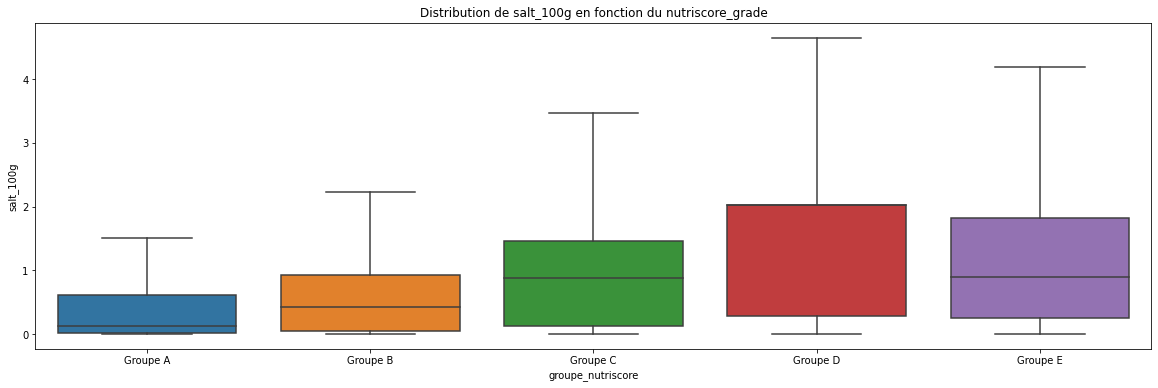

Test de kruskall-wallis entre salt_100g et nutrition_grade
D= 49219.73970903919
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => salt_100g is correlated to nutrition_grade_fr
----------------



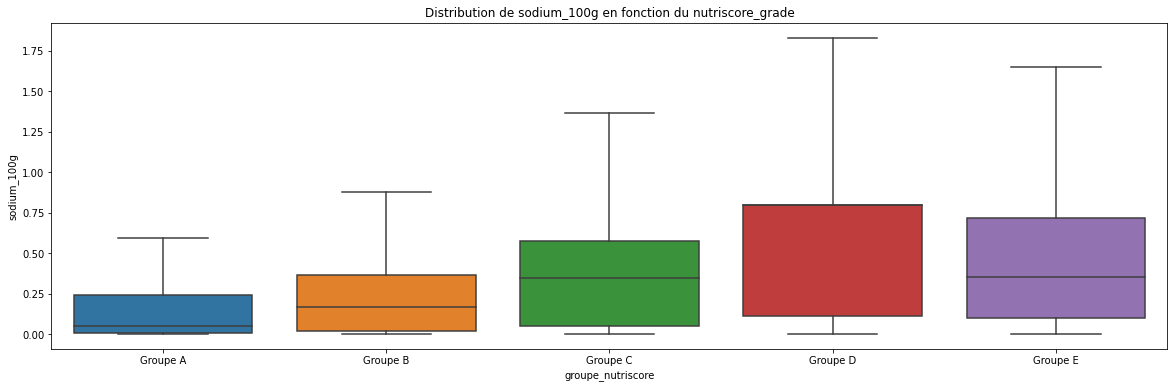

Test de kruskall-wallis entre sodium_100g et nutrition_grade
D= 49214.65871900074
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => sodium_100g is correlated to nutrition_grade_fr
----------------



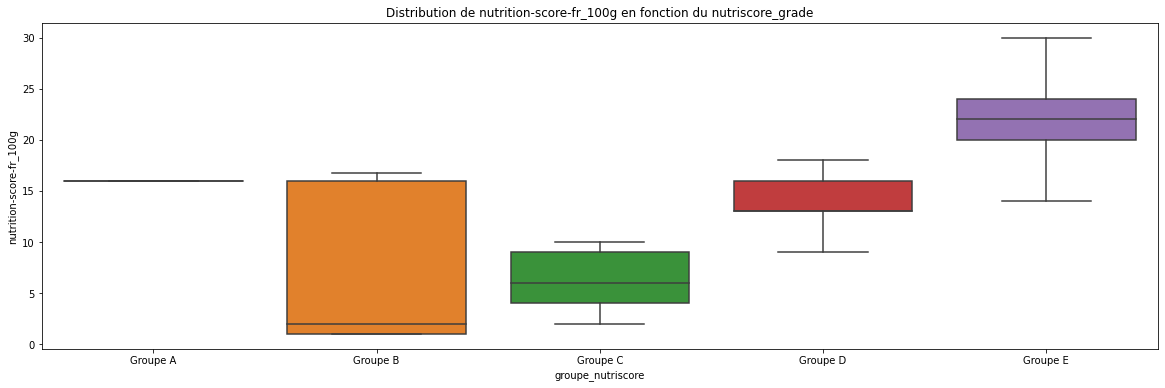

Test de kruskall-wallis entre nutrition-score-fr_100g et nutrition_grade
D= 203494.3160286262
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => nutrition-score-fr_100g is correlated to nutrition_grade_fr
----------------



In [24]:
alpha= 0.05
print('===================\nnull hypothesis : the median of all of the groups are equal.\n ===================\n\n')

for i in data.columns[:-2]:
    
    data.sort_values("groupe_nutriscore", inplace = True)
    plt.subplots(figsize=(20,6))
    ax = sns.boxplot(y=i, x="groupe_nutriscore", data=data, showfliers=False).set(title="Distribution de " + i + " en fonction du nutriscore_grade" )
    plt.show()
    
    team_a = data[data.groupe_nutriscore == 'Groupe A'][i]
    team_b = data[data.groupe_nutriscore == 'Groupe B'][i]
    team_c = data[data.groupe_nutriscore == 'Groupe C'][i]
    team_d = data[data.groupe_nutriscore == 'Groupe D'][i]
    team_e = data[data.groupe_nutriscore == 'Groupe E'][i]
    
    
    D, pval =  stats.kruskal(team_a, team_b, team_c, team_d, team_e)
    
    print('Test de kruskall-wallis entre {} et nutrition_grade'.format(i))
    print('D= {}\nP-value= {}'.format(D,pval))
    
    if pval<alpha: 
        print('P-value is lower than alpha ({}) we can reject the null hypothesis\n => {} is correlated to nutrition_grade_fr'
              .format(alpha,i))
    else : 
        print('We cannot reject the null hypothesis')
    print('----------------\n')

Plus le groupe est élevé (c,d,e) plus l'énergie est élevé. l'énergie est donc corrélé avec le nutriscore_grade_fr.
Toute nos variables sont corrélées avec le nutriscore_grade_fr.

### ANALYSE MULTIDIMENTIONNELLE  ACP

In [37]:
data_pca = data.copy()

In [38]:
data_pca.drop(columns=['nutrition_grade_fr', 'nutrition-score-fr_100g', 'sodium_100g', 'groupe_nutriscore'],inplace=True)
data_pca

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
235646,64.0,0.00,0.00,1.90,1.70,1.400000,1.20,0.91400
14957,1490.0,0.00,0.00,80.00,0.00,2.200000,6.67,0.00000
239407,260.0,0.00,0.00,13.00,0.60,1.700000,1.20,0.50000
100310,176.0,1.25,0.00,6.67,2.50,1.700000,1.67,0.65532
100309,176.0,1.25,0.00,6.67,2.50,1.700000,1.67,0.65532
...,...,...,...,...,...,...,...,...
180669,2021.0,21.00,14.00,67.00,33.00,5.890818,5.20,0.34000
107861,2092.0,30.00,20.00,40.00,0.00,0.000000,20.00,4.31800
122264,1987.0,27.50,17.50,60.00,50.00,5.000000,5.00,0.15748
180645,1909.0,26.80,12.90,43.40,32.00,4.275955,9.30,0.38000


In [39]:
names = data_pca.index
names

Int64Index([235646,  14957, 239407, 100310, 100309, 253451, 143246, 188919,
             15153, 100273,
            ...
             29959, 180658,  17724, 249932, 301109, 180669, 107861, 122264,
            180645, 167660],
           dtype='int64', length=320772)

In [40]:
features = data_pca.columns
features

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'],
      dtype='object')

In [41]:
X = data_pca.values
X[:10]

array([[6.40000000e+01, 0.00000000e+00, 0.00000000e+00, 1.90000000e+00,
        1.70000000e+00, 1.40000000e+00, 1.20000000e+00, 9.14000000e-01],
       [1.49000000e+03, 0.00000000e+00, 0.00000000e+00, 8.00000000e+01,
        0.00000000e+00, 2.20000000e+00, 6.67000000e+00, 0.00000000e+00],
       [2.60000000e+02, 0.00000000e+00, 0.00000000e+00, 1.30000000e+01,
        6.00000000e-01, 1.70000000e+00, 1.20000000e+00, 5.00000000e-01],
       [1.76000000e+02, 1.25000000e+00, 0.00000000e+00, 6.67000000e+00,
        2.50000000e+00, 1.70000000e+00, 1.67000000e+00, 6.55320000e-01],
       [1.76000000e+02, 1.25000000e+00, 0.00000000e+00, 6.67000000e+00,
        2.50000000e+00, 1.70000000e+00, 1.67000000e+00, 6.55320000e-01],
       [9.79000000e+02, 8.93787441e+00, 2.70000000e+00, 1.69379135e+01,
        1.00000000e+00, 0.00000000e+00, 1.90000000e+01, 1.30000000e-01],
       [2.80000000e+02, 2.10000000e-01, 0.00000000e+00, 1.04200000e+01,
        7.08000000e+00, 0.00000000e+00, 5.42000000e+00, 4.

In [42]:
type(X)

numpy.ndarray

In [43]:
X.shape

(320772, 8)

On a commencé par scaler les données et les instancier : 

In [44]:
scaler = StandardScaler()

On fit ensuite : 

In [45]:
scaler.fit(X)

StandardScaler()

Puis les transforme

In [46]:
X_scaled = scaler.transform(X)

In [47]:
X_scaled[:6]

array([[-0.18545434, -0.67435144, -0.69901072, -0.86228504, -0.69425721,
        -0.07922299, -0.77595925, -0.00973644],
       [ 0.05967388, -0.67435144, -0.69901072,  1.37062277, -0.77976309,
        -0.00426218, -0.05390567, -0.0177204 ],
       [-0.1517621 , -0.67435144, -0.69901072, -0.54493194, -0.74958455,
        -0.05111268, -0.77595925, -0.01335281],
       [-0.16620163, -0.60878469, -0.69901072, -0.72590898, -0.65401915,
        -0.05111268, -0.71391808, -0.01199606],
       [-0.16620163, -0.60878469, -0.69901072, -0.72590898, -0.65401915,
        -0.05111268, -0.71391808, -0.01199606],
       [-0.0281666 , -0.2055295 , -0.30720947, -0.43234554, -0.72946552,
        -0.21040439,  1.57368492, -0.01658482]])

Rappelons qu'on peut faire les 2 opérations en une seule :

In [48]:
X_scaled = scaler.fit_transform(X)

On espère avoir une moyenne à 0 et un écart type à 1 :

In [49]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##### PCA

Nous allons travailler sur les 9 premières composantes et laisser le nutriscore à côté : 

In [50]:
n_components = 6

On instancie notre ACP : 

In [51]:
pca = PCA(n_components=n_components)

On l'entraine sur les données scalées : 

In [52]:
pca.fit(X_scaled)

PCA(n_components=6)

#### Explained variance & scree plot 

Nous allons nous intéresser à la variance captée par chaque composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [53]:
pca.explained_variance_ratio_

array([0.32402302, 0.19655489, 0.12500634, 0.12164729, 0.11880161,
       0.0796079 ])

Ici la 1ère composante capte 26% de la variance de nos données initiales, la 2ème 20% etc etc.

Enregistrons cela dans une variable :

In [54]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([32.4 , 19.66, 12.5 , 12.16, 11.88,  7.96])

Les 2 premières composantes captent donc 44+20 = 66% de la variance, les 3 premières 44+20+13 = 77% de la variance etc etc.

Cela s'appelle une somme cumulée. Et pour faire une somme cumulée numpy dispose de la fonction cumsum :

In [55]:
scree_cum = scree.cumsum().round()
scree_cum

array([32., 52., 65., 77., 89., 97.])

Définisons ensuite une variable avec la liste de nos composantes :

In [56]:
x_list = range(1, n_components+1)
x_list = [*x_list]
x_list

[1, 2, 3, 4, 5, 6]

On peut enfin l'afficher de façon graphique :

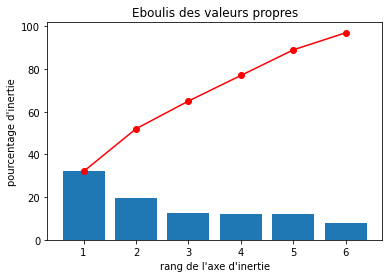

In [57]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 4 premières composantes, et près de 90% dans les 5 premières.

### Components 

Nous allons nous intéresser maintenant à nos composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.

La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

In [58]:
pcs = pca.components_
pcs

array([[ 0.1250509 ,  0.48229155,  0.31429057,  0.49219713,  0.35226027,
         0.51967328,  0.12865653, -0.00452009],
       [-0.0591436 , -0.38656665, -0.44758547,  0.39999785,  0.50077208,
         0.04516605, -0.48362882,  0.00526597],
       [ 0.02659331,  0.00802261,  0.02366585, -0.00499742,  0.01015319,
        -0.01766644, -0.01595935,  0.99898623],
       [ 0.98384088, -0.06224876, -0.00208354, -0.04944644,  0.02015483,
        -0.11999926, -0.1001893 , -0.02981576],
       [ 0.10793511, -0.16989876, -0.60764752,  0.18792592, -0.2667974 ,
         0.35439499,  0.59758635,  0.03235195],
       [ 0.01642687,  0.32119866, -0.23820291, -0.09707322, -0.51595547,
         0.4352848 , -0.61211659,  0.00530338]])

Affichons la même chose mais version pandas :

In [59]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.125051,0.482292,0.314291,0.492197,0.352260,0.519673,0.128657,-0.004520
1,-0.059144,-0.386567,-0.447585,0.399998,0.500772,0.045166,-0.483629,0.005266
2,0.026593,0.008023,0.023666,-0.004997,0.010153,-0.017666,-0.015959,0.998986
3,0.983841,-0.062249,-0.002084,-0.049446,0.020155,-0.119999,-0.100189,-0.029816
4,0.107935,-0.169899,-0.607648,0.187926,-0.266797,0.354395,0.597586,0.032352
5,0.016427,0.321199,-0.238203,-0.097073,-0.515955,0.435285,-0.612117,0.005303


Nous allons continuer le travail : 

In [60]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
F1,0.13,0.48,0.31,0.49,0.35,0.52,0.13,-0.00
F2,-0.06,-0.39,-0.45,0.40,0.50,0.05,-0.48,0.01
F3,0.03,0.01,0.02,-0.00,0.01,-0.02,-0.02,1.00
F4,0.98,-0.06,-0.00,-0.05,0.02,-0.12,-0.10,-0.03
F5,0.11,-0.17,-0.61,0.19,-0.27,0.35,0.60,0.03
F6,0.02,0.32,-0.24,-0.10,-0.52,0.44,-0.61,0.01


Nous allons arrondir les résultats pour simplifier l'analyse

Alors, comment calcule t-on la première composante F1 ?

et bien c'est assez simple :

F1 = (0.23 * inscription) + (-0.45 * progression) + ... + (0.45 * nbEvaluations)

et F2 ?

F2 = (0.14 * inscription) + (-0.10 * progression) + ... + (0.21 * nbEvaluations)

Dans certains cas, on voudra afficher ce dataframe comme cela :

In [61]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.125051,-0.059144,0.026593,0.983841,0.107935,0.016427
fat_100g,0.482292,-0.386567,0.008023,-0.062249,-0.169899,0.321199
saturated-fat_100g,0.314291,-0.447585,0.023666,-0.002084,-0.607648,-0.238203
carbohydrates_100g,0.492197,0.399998,-0.004997,-0.049446,0.187926,-0.097073
sugars_100g,0.352260,0.500772,0.010153,0.020155,-0.266797,-0.515955
fiber_100g,0.519673,0.045166,-0.017666,-0.119999,0.354395,0.435285
proteins_100g,0.128657,-0.483629,-0.015959,-0.100189,0.597586,-0.612117
salt_100g,-0.004520,0.005266,0.998986,-0.029816,0.032352,0.005303


Et pour une représentation plus visuelle, comme cela :

<AxesSubplot:>

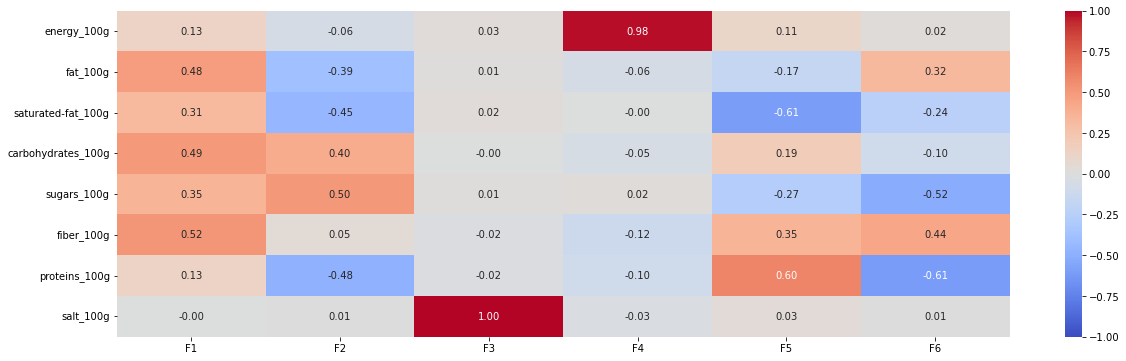

In [62]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Correlation graph 

Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Ensuite les deux suivantes et deux d'après, comme - en code - on commence à compter à partir de 0, cela nous donne :

In [63]:
x, y = 0,1

Pour la partie graphique :

On peut en faire une fonction :

In [64]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Essayons cette fonction pour F1 et F2

-- ATTENTION -- Encore une fois Pour F1 et F2 il faut bien préciser 0 et 1 😀

In [65]:
x_y = (0,1)
x_y

(0, 1)

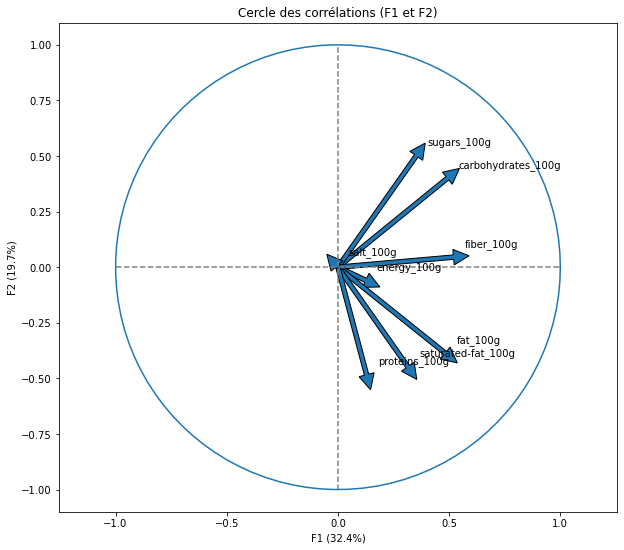

In [66]:
correlation_graph(pca, x_y, features)

Relation entre le sucre et le carbohydrates et une correlation entre le fact et satured-fat, le protéines est positivement corrélées à protéines fats. Les aliments ont plus de gras et moins de sucre. 

Essayons pour F3 et F4 :

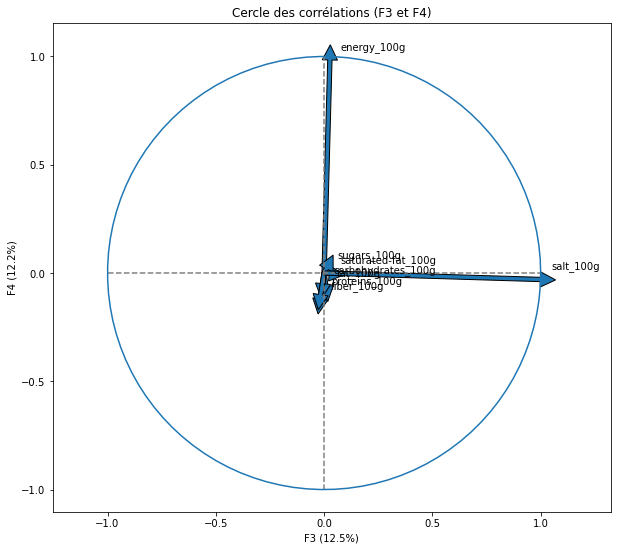

In [67]:
correlation_graph(pca, (2,3), features)

Nous pouvons voir ici que les varibles : énergie et sel ne sont pas très correlées

##### Projection

Nous allons travailler maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [68]:
X_proj = pca.transform(X_scaled)
X_proj[:9]

array([[-1.37804946,  0.26358727, -0.02556749, -0.02283951,  0.050393  ,
         0.82921109],
       [-0.14659733,  0.75356659, -0.0518993 ,  0.02509572,  0.97708175,
         0.25120545],
       [-1.22250103,  0.36207935, -0.0309285 , -0.00976419,  0.13827479,
         0.83972131],
       [-1.24012103,  0.28305574, -0.02854653, -0.02343338,  0.10318852,
         0.79083537],
       [-1.24012103,  0.28305574, -0.02854653, -0.02343338,  0.10318852,
         0.79083537],
       [-0.57576312, -1.09028389, -0.05287998, -0.13952524,  1.1972345 ,
        -0.62991184],
       [-1.14934661,  0.21470756, -0.03708894, -0.03342904,  0.31226149,
         0.27197378],
       [-0.21487466,  0.2057085 , -0.04166262, -0.0575218 ,  0.91205173,
         0.28630049],
       [-1.15619187,  0.36156893, -0.03692712, -0.0151611 ,  0.21805231,
         0.7457791 ]])

Rappelons aussi que :

In [69]:
x_y

(0, 1)

In [70]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='20', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


In [71]:
data.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr',
       'groupe_nutriscore'],
      dtype='object')

fiber_100g, additives_n, code 

Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :

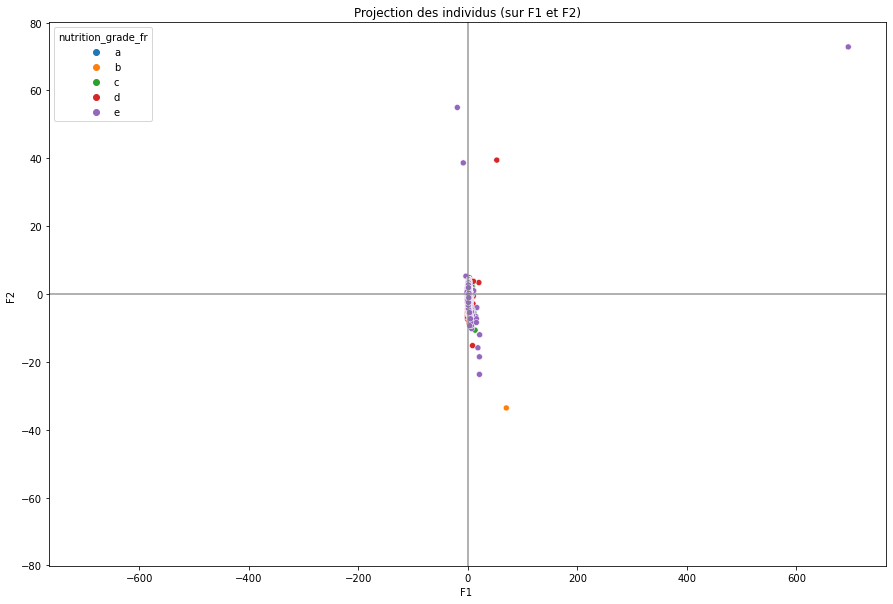

In [72]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, figsize=(15,10), clusters=data['nutrition_grade_fr'])

Les aliments du nutriscore "e" vont être plus en haut et ce sont les aliments qui auront beaucoup des sucres et des carbohydrates. 

Essayons la version plus élaborée avec F1 et F2 :

Essayons ensuite avec F2 et F3 :

##### QUESTION 4

Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données nutritionnelles.

Idées :

Créer une fonction qui prends en paramètre en paramètre les valeurs en quantité de ce produit et si les quantités dépassent les seuils fixés au départ le produit est rejeté et on en propose un autre et ainsi de suite. 


Identifier les caractéristiques nutritionnelles des produits mauvais nutriscores et étiqueter automatiquement les produits qui ont des caractéristiques similaires

Calcul automatique de nutriscore et vérifier si le nombre d'additifs est lié au nutriscore / mettre un indicateur sur le nombre d'additifs. 

Cépendant dans notre cas le nutriscore n'est pas une condition vitale pour le choix ou non de notre produit, ce qui nous permettra de faire les choix d'un produit, c'est les quantités existants dans celui ci qui peut être corréler avec le nutriscore. 